# Generalities

Study of the article "Solving Linear Inverse Problems Using the Prior Implicit in a Denoiser" by Zahra Kadkhodaie and Eero P. Simoncelli.

## Issues Related to the Article

Specific Issue: Image Denoising.

General Issue: Understanding the inherent factors that distinguish a real image from a non-real one. Mathematically, an image is just an N-dimensional vector. Why does our brain interpret one vector as a real image while another is not (notion of prior)? What should an image look like to be considered a real image?
## What is the Objective of the Article?

To extract information from a noisy signal, there are methods in signal processing, involving deduction based on partial information from the original signal.

These methods are not effective in image processing because the dataset is too large.

Machine learning methods have revolutionized this image processing problem. With methods like CNN, it is now easy to extract an original image from a noisy one.

The issue with these methods is their specificity to each problem. Methods with prior knowledge (partial information) are more universal.

**The objective of this article is to attempt to extract, from machine learning, the way it implicitly incorporates sophisticated prior knowledge of images. The article specifically focuses on the case of Gaussian noise.**

More Precise Framework Compared to Methods Used in the Literature So Far

The two denoising methods are:

1. **Traditional Approach:** $ \hat{x}(y) = \int x p(x|y)dx = \int x p(y|x)p(x)dx / p(y) $ where $y$ is the noisy image, x is the original image, and $\hat{x}(y)$ is the estimation of x

    - Selection of a prior probability model $p(x)$.
    - Combination with a likelihood function $p(x|y)$ describing the noisy measurement process- Problem resolution by calculating the minimum mean squared error (MMSE) estimate ($\hat{x}(y)$) from the integration of the posterior density.

Issue: Prior probability $p(x)$ is difficult to obtain, if not impossible, especially in the case of image processing.

2. **Modern Supervised Learning Denoising Approach:**
    - Supervised learning of a direct mapping function from noisy images to denoised images using convolutional neural networks (CNN).
    - Parametrization of the estimation function in parametric form.
    - Adjustment of parameters by minimizing the mean squared error of denoising on an extensive training set.
    - CNNs, trained to handle various levels of noise, perform an approximate projection onto a low-dimensional subspace, interpreted as a tangent hyperplane of the image manifold.

Issue: Requires prior supervised training, often leading to parameter overfitting, and lacks universality.


### Goal

1. Take an image.
2. Apply a Gaussian filter to it.
3. Apply an algorithm to obtain a denoised image as close as possible to the original image.

## Representation of Real and Noisy Images

We can view images as vectors evolving in $\mathbb{R}^N$, where $N$ is the number of pixels composing the image. This is the representation used for encoding images.

We can visually represent these images in a 2D space for better understanding. The plane represents the set of all possible images $E$, and a point on this plane corresponds to an image $x\in E$.

- Real/natural images (those recognized as "realistic" by the eye) reside in a lower-dimensional subspace than $E$. Images in this subspace are approximately equiprobable, at least locally. The probability $p(x)$ that $x$ is a natural image is zero everywhere except where $x$ resides in space. As depicted in the image below, we represent the set of images that the eye would perceive as "sharp parrot images."

<img src="figs/fig1.png" width="680" height="250">
    
- Observed/noisy images (in our case, with Gaussian noise) are blurred (Gaussian) versions of the priors. The associated observation densities are Gaussian representations of the priors. As shown in the image below (for increasing variance values), the further away from the subspace, the more the parrot image appears blurry. We denote these images as $y$ and their associated probability as $p(y)$.

<img src="figs/fig2.png" width="630" height="265">

## Principle of the Method with Gaussian Noise
### Link between $y$   and $x$ 

$y$ and $x$ are linked by the equation $y = x + z$, where $x \in \mathbb{R}^N$ represents the original image drawn from $p(x)$, and $z \sim \mathcal{N}(0, \sigma^2I_N)$ is a sample of Gaussian white noise.

### Classic Machine Learning Approach for Image Denoising

In classical machine learning, the least squares method is typically used.


Formula used:

<img src="figs/fig3.png" width="630" height="265">

Method schema:
![](https://latex.codecogs.com/svg.latex?\hat{x}(y)=\text{argmin}_{\hat{x}}\int||\hat{x}-x||^2p(x|y)dx=\int\left.xp(x|y)dx\right.) 

This results in a neural network (for example, a CNN) trained for denoising images with Gaussian noise denoted as $\hat{x}_{CNN}(y)$.


### Machine Learning Approach Using Implicit Prior

Miyasawa (1961) showed that the least squares estimate could be written (exactly) in the case of Gaussian contamination with variance $\sigma$ as follows:

![](https://latex.codecogs.com/svg.latex?\hat{x}(y)=\int(xp(x|y)dx)=y+\sigma^2\nabla_y\log(p(y)))

The approach will then be to combine this exact result with the neural network obtained. **The method is explained below in the algorithm section**. We obtain a simple algorithm that can be directly applied to a noisy image.

### Advantages of the Second Method

A classic machine learning algorithm minimizes a function between the neural network parameters and the initial image. This often leads to overfitting of the problem. Our neural network is effective in recovering the original image, but it is only good for that image or similar ones it has been trained on. It also requires a lengthy training phase.

With the method in the article, to recover an image close to the original, we don't need to know the original image, making it more universal: there's no need to have a network trained for a very specific type of image.

Researchers have also shown that the image recovered with the second method is of better quality in many cases.

So, we already have three advantages:
- No need to build a neural network to denoise the image, and thus, no need to know the original image (as there is no need for supervised learning).
- Universal method for any image subjected to a Gaussian filter. It is not effectively specific to certain images.
- Results are comparable or better than with a CNN without prior.

### Example of Denoising with the Algorithm
![](figs/synthesis_mnist_1.png)



# Technical Section on Article Contributions: Detailed Algorithms
## Basic Algorithm
### Principle

- We start with an initial condition $y_0$ (an image with Gaussian noise), and we aim to recover the true image $x$. We denote the denoised image as $\hat{x}(y_0)$.
    Since the noise is Gaussian, we know the exact expression for the denoised image:

![](https://latex.codecogs.com/svg.latex?\hat{x}(y)=\int(xp(x|y)dx)=y+\sigma^2\nabla_y\log(p(y)))

However, we do not know the variance $\sigma$ used to add noise to the image.

- On the other hand, we have a trained CNN (for denoising images with Gaussian noise) denoted as $\hat{x}_{CNN}(y)$. Here, we use the concept of an implicit prior. The trained neural network provides good results and has an approximate version of the exact expression mentioned above. We combine it with the formula to obtain a high-quality denoised image.

- We have: $\sigma^2\nabla_y\log(p(y)))=\hat{x}(y)-y$. Thus, an approximate version of $\sigma^2\nabla_y\log(p(y_0)))$ is given by: $\hat{x}{CNN}(y_0)-y_0 = f(y_0)$ ($f$ for residual). Therefore, $\hat{x}{approx}(y_0) = y_0 + f(y_0)$.

- By writing the approximate value in this way, we only obtain $\hat{x}{CNN}(y_0)$ and do not fully utilize the formula. Therefore, we introduce a control parameter $h$ ranging from 0 to 1, which controls the residue injected into $y_0$: $\hat{x}{approx}(y_0) = y_0 + hf(y_0)$.

- $\hat{x}{approx}(y_0)= y_0(1-h) + \hat{x}{CNN}(y_0)$, now denoted as $y_1$, is a new noisy image with variance $\sigma_1=\sigma_0(1-h)$. This expression is correct if we consider $\hat{x}_{CNN}$ as perfect, i.e., non-stochastic. Note that $\sigma_1<\sigma_0$. Thus, $y_1$ is an image with noise from the manifold space but less noisy than the previous one.

- By iterating this process until the variance $\sigma_n$ is below a threshold value, we obtain a noise-free image from the manifold space, i.e., a real image (i.e., noise-free, $p(x)$ Dirac).

- This image does not necessarily correspond to $\hat{x}(y_0).$ However, through the construction of the algorithm, we obtain an image that is **real/natural-looking** and close to $\hat{x}(y_0)$ (as it is not too far in the manifold space).
    
### Formal Representation

**Algorithm 0: Coarse-to-fine gradient ascent method for sampling from the implicit prior of a denoiser, using denoiser residual $f(y) = \hat{x}(y) - y$.

*Parameters:* $\sigma_0, \sigma_L, h$

*Initialization:* $t = 1$, draw $y_0 \sim \mathcal{N}(0.5, \sigma_0^2I)$

**while*** $\sigma_{t-1} \leq \sigma_L$ do:
- $d_t = f(y_{t-1})$
- $y_t \leftarrow y_{t-1} + h d_t$
- $t \leftarrow t+1$

**end while**

## Improved Algorithm with Noise Injection at Each Iteration and Modification of Control Parameter
### Importance of Injecting Noise

Two reasons:

1. Avoid falling into a local minimum.
2. Enable stochastic exploration of the entire space (manifold). Since the desired image is the most real, there is a natural advantage in getting close to it by performing extensive exploration of the space.

### Importance of Control Parameter Modification

The authors showed that a constant control parameter led to high-quality results but required a large number of iterations. To accelerate convergence, they adapt the step $h$ at each time (the idea is to start with a small step when gradients are significant and increase the step as the number of iterations increases). This new step at iteration $t$ is denoted as $h_t$.

*Note*: A formula is provided in the article but is not justified. The authors simply assert that it improves convergence.

### Principle

- In addition to the basic algorithm, at each iteration, they add a piece of Gaussian noise $\gamma_t z_t$ with $z_t \sim \mathcal{N}(0, I)$ and $\gamma_t$ as a control parameter.

How to choose the control parameter to ensure convergence? We want the variance for the new iteration to have the form: $\sigma_t^2=\sigma_{t-1}^2(1-\beta h)^2$ with $\beta$ between 0 and 1.

By combining the two expressions, we obtain a formula for $\gamma_t$.

- In addition to the basic algorithm, at each iteration, the control parameter for adding residues is modified in a particular way: $h_t = \frac{h_0 t}{1 + h_0 (t - 1)}$. This allows for a step that starts at a small value $h_0$ and gradually tends towards 1.

### Formal form

**Algorithm 1**: Coarse-to-fine stochastic ascent method for sampling from the implicit prior of a denoiser, using denoiser residual $f(y) = \hat{x}(y) - y$.

*Parameters*: $\sigma_0, \sigma_L, h_0, \beta $

*Initialization*: $t = 1$, draw $y_0 \sim \mathcal{N}(0.5, \sigma_0^2I)$

**while **$\sigma_{t-1} \leq \sigma_L$ do:

- $h_t = \frac{h_0 t}{1 + h_0 (t - 1)}$
- $d_t = f(y_{t-1})$
- $\sigma_t^2 = |d_t|^2/N$
- $\gamma_t^2 =((1 - \beta h_t)^2-(1 - h_t)^2) \sigma{t}^2$
- Draw $z_t \sim \mathcal{N}(0, I)$
- $y_t \leftarrow y_{t-1} + h_t d_t + \gamma_t z_t$
- $t \leftarrow t+1$

**end while**

#### Note

If we take white noise as the starting image, then this algorithm allows for image generation (image synthesis).

## Generalization of the Algorithm to Linear Inversion Problems
### New Problem

We want to use this algorithm in cases where $x$ is incomplete. We can, for example, mention problems such as:

- removal of a block of pixels
- removal of random pixels
- compressed image, i.e., a loss of resolution
- image missing certain frequencies

All these problems are called linear because we can write the incomplete image of $x$ denoted as $x^c$ as the product of $x$ by a transformation matrix: $x^c = M^Tx$. These notations are explained in more detail in the paragraph below.

To remember, for this new problem:

**We no longer have $y$ as a noisy image of the image $x$, but we have $y$ as the noisy image of an incomplete image of $x$. Therefore, we are no longer interested in $p(y|x)$ but in $p(y|x^c)$ with $x^c = M^Tx$ a linear transformation of $x$.**

### Reminder of Linear Algebra and Notation for the Following

There are two ways to decompose an element $x$ from a set $E$:
#### 1. Orthogonal Decomposition

If $E$ is a vector space with a scalar product, we can decompose any element $x$ of $E$ using a projection space $P$ and its orthogonal complement $P^\perp$.

Let $E$ be a Euclidean vector space and $P$ a subspace of $E$. Then, for any $x \in E$, there exists a unique $p_x \in P$ and a unique $p_x^\perp \in P^\perp$ such that $x = p_x + p_x^\perp$, where $p_x$ is in $P$ and $p_x^\perp$ is in $P^\perp$, and they are orthogonal to each other.

Mathematically, this can be expressed as follows, assuming that $\langle \cdot, \cdot \rangle$ represents the scalar product:

$x = p_x + p_x^\perp, \text{ where } p_x \in P, \ p_x^\perp \in P^\perp, \ \text{and} \ \langle p_x, p_x^\perp \rangle = 0.$

In this context, the decomposition is unique and depends only on the choice of $P$.

**In this decomposition, the projections are vectors in $E$.**

#### 2. Matrix Projected Orthogonal Decomposition

In our case, $E=\mathbb{R}^n$ with $n$ being the number of pixels. Therefore, we can express the problem in matrix form.

Let $x$ be an element of $E$, $P\in\mathbb{R}^m$ and $P^\perp\in\mathbb{R}^k$, two complementary subspaces of dimension smaller than $n$, such that $P \oplus P^\perp = E$. The matrix decomposition can be reduced to the following equation:

$x = Mx^c + \bar{M}x^u$

where:

- $M\in\mathbb{R}^{n \times m}$,
- $\bar{M}\in\mathbb{R}^{n \times k}$,
- $x^c=M^Tx$,
- $x^u=\bar{M}^Tx$.

#### Link between Decompositions

These decompositions are equivalent, and we have:

- $p_x = Mx^c = MM^Tx$
- $p_x^\perp = \bar{M}x^u = \bar{M}\bar{M}^Tx = (I_n - MM^T)x$

### How to Determine  $p(y|x^c)$?

- Firstly, note that $y$ can be expressed as: $y=Mx^c+z$, where $z$ is Gaussian noise as defined before.

- To use the basic algorithm principle, we need to express the term: $\sigma^2\nabla_y\log(p(y|x^c)))$.

We decompose $y$ as we decomposed $x$ on the basis defined by the matrix $M$ and its orthogonal complement.

$p(y|x^c) = p(y^c, y^u|x^c) = p(y^u|y^c, x^c)p(y^c|x^c) = p(y^u|x^c)p(y^c|x^c)$

And thus:

$\sigma^2\nabla_y\log(p(y|x^c))) = \sigma^2\nabla_y\log(p(y^c|x^c))) + \sigma^2\nabla_y\log(p(y^u|x^c)))$

This expression of $A = \sigma^2\nabla_y\log(p(y|x^c)))$ is actually equivalent to a decomposition on the basis defined by the matrix $M$ and its orthogonal complement:

$A = p_A + p_A^\perp$

- Lets determine each component (for clarity, it is a good idea to visualize the problem as a drawing, especially when $M$ corresponds to the removal of a block of pixels):

### $p_A$

- If we had $y=x+z$, then according to Miyasawa, we would have:
$B = \sigma^2\nabla_y\log(p(y))) = \hat{x}(y)-y = p_{x-y}+p_{x-y}^\perp$

By the uniqueness of the decomposition: $p_B = p_{x-y}$

Now: $p_{x-y} = M(x^c - y^c)$

Since we have $y^c=x^c + z^c$, we are exactly in the Miyasawa framework for ycyc, and therefore, p_B = p_A$ ie $p_A = M(x^c - y^c)$. 

In summary, as in the subspace defined by the matrix $M$, we have $y^c=x^c + z^c$ $ie$, we are in the Miyasawa framework for $y^c$, we exactly have: $p_A = M(x^c - y^c)$.

### $p_A^\perp$

- For the orthogonal complementary space, we have: $y^u = z^u$, so we cannot make the same reasoning. We will be forced to use the same maneuver as we used for the basic algorithm, i.e., to use the approximate gradient of probability with the trained neural network.

We have: $\hat{x}(y) \simeq y + A$ *ie* $A\simeq f(y)$, the residue of the value determined by the neural network.

By the uniqueness of the decomposition (cf. linear algebra reminder), we have: $p_A^\perp=(I_n - MM^T)A$.

By combining the last two equalities, we thus have: $p_A^\perp=(I_n - MM^T)f(y)$.


### Total Result

- **$ \nabla \log p(y|x^c) = (I_n - MM^T)f(y) + M(x^c - M^Ty). $** : Expression using known parameters!

- Compared to the basic algorithm, we replace: $d_t = f(y_{t-1})$ with $d_t = (I-M M^T)f(y_{t-1}) + (Mx^c - MM^Ty_{t-1})$

### Formal form:


**Algorithm 2**: Coarse-to-fine stochastic ascent method for sampling from sampling from $p(x|M^Tx=x^c)$, based on the residual of a denoiser, $f(y) = \hat{x}(y) - y$. 

Note : $e$ is an image of ones.

*Parameters:* $\sigma_0, \sigma_L, h_0, \beta, M, x^c $

*Initialization:* $t = 1$, draw $y_0 \sim \mathcal{N}(0.5(I-M M^T)e+ Mx^c, \sigma_0^2I)$

**while** $\sigma_{t-1} \leq \sigma_L$ do:

- $h_t = \frac{h_0 t}{1 + h_0 (t - 1)}$
- $d_t = (I-M M^T)f(y_{t-1}) + (Mx^c - MM^Ty_{t-1})$
- $\sigma_t^2 = \|d_t\|^2/N$
- $\gamma_t^2 =((1 - \beta h_t)^2-(1 - h_t)^2) \sigma{t}^2$
- Draw $z_t \sim \mathcal{N}(0, I)$
- $y_t \leftarrow y_{t-1} + h_t d_t + \gamma_t z_t$
- $t \leftarrow t+1$

**end while**



## Some Results from the Article Using the Final Algorithm
### Solving Linear Inverse Problems Using the Implicit Prior
1. Impaint (Restoration)

Here, the algorithm must fill in a block of missing pixels (i.e., the measurement consists of pixels outside the missing block). With different initializations and different additive noise levels, the algorithm converges to different solutions (different points on the manifold).

![](figs/inpaint_samples_flower.png)

2. Random Missing Pixels

The measurements consist of a randomly selected subset of 10% of pixels.

![](figs/random_pix_samples_zebra.png)


3. Super-Resolution

The measurements are averages of non-overlapping 4x4 pixel blocks.

![](figs/super_res_pepper.png)

4. Spectral Super-Resolution

The measurements consist of 10% of Fourier coefficients (lowest frequencies).

![](figs/deblur_butterfly.png)


5. Random Basis (Compressive Sensing)

Here, the measurement matrix $M$ contains random orthogonal unit vectors spanning a subspace with a dimensionality of 10% of the image's dimensionality. Thus, the measurements are projections of the image onto a random low-dimensional subspace.

![](figs/rand_basis_soldier.png)

# Specificities of the article compared to the state of the art

1942, Weiner: Denoising of Gaussian noise equivalent to a projection onto low frequencies.

1994, Donoho & Johnstone: Generalization of this result, image denoising corresponds to projection onto a suitable subspace (e.g., low frequencies for Gaussian noise).

2017, Zhang et al.: DnCNN, a neural network architecture specialized in image denoising, leveraging the power of CNNs to learn denoising models from training data.

The authors' question is, what do we do once we have obtained this optimized neural network with DnCNN?

- Analysis: Property of the captured map.
- Interpretation: What is the implicit "prior"?
- Generalization: Can it be used for something else?

A method that already existed before the article is **Plug and Play** (PnP). Before the introduction of PnP, there were good results for denoising on one side and good results for non-noisy image reconstruction separately, but it was challenging to combine state-of-the-art methods for both problems. The Plug & Play approach introduced a formalism that separates the denoising and reconstruction optimization parts, allowing the use of state-of-the-art methods in each part of the process.

The method proposed in the article is similar to PnP since it separates denoising using CNN and restoration using the Miyasawa formula. Although it does not minimize MSE (or PSNR score), the obtained results are less blurry and do not exhibit visual artifacts, making them more realistic compared to what could be obtained with **RED**, for example.

# Notebook Reproducing Part of the Experiments

## Denoising Neural Network

In [59]:
import numpy as np
from skimage.metrics import structural_similarity, peak_signal_noise_ratio
import matplotlib.pylab as plt
import os
import time
import torch
import sys
sys.path.insert(0, 'code')
from Utils_inverse_prob import *
from network import *
from algorithm_inv_prob import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Architecture and Training

In [145]:
architecture = 'BF_CNN'

# Choix de bdd: 'mnist_gray', 'BSD300_color', 'BSD400_gray'
training_data = 'BSD300_color'

if 'color' in training_data.split('_'): 
    grayscale = False # number of input and output channels is 3
    C = 3
else: 
    grayscale = True # number of input and output channels is 1
    C = 1
    
training_noise='noise_range_0to100' # Le réseau de neurone est entraîné sur des images de bruit d'amplitude variées

denoiser = load_denoiser(architecture=architecture, 
                         grayscale=grayscale, 
                         training_data=training_data, 
                         training_noise=training_noise)

denoiser.eval();

Neural network effect on a noisy image

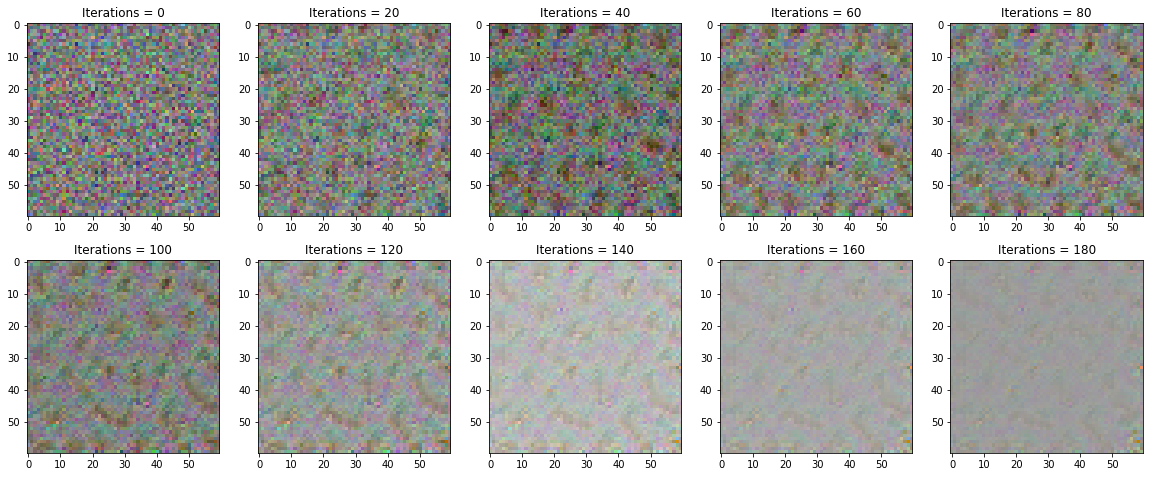

In [218]:
patch_size = (C,60,60)
x_c = torch.zeros(patch_size) 

y = torch.normal(x_c, sig_0)
n_ch,im_d1,im_d2 = y.size()
N = n_ch* im_d1*im_d2
f_y = y.unsqueeze(0)
f_y.requires_grad = False
fig = plt.figure(figsize=(20,8))
for i in range(0, 200):
    if i%20==0:
        plt.subplot(2,5,int(i/20+1))
        to_print = f_y[0]
        plt.imshow(rescale_image(to_print.permute(1,2,0).detach().numpy()))
        plt.title("Iterations = {}".format(i))
    with torch.no_grad():
        f_y = denoiser(f_y)

### Image Synthesis
In the context of image synthesis, the algorithm is provided with an image composed solely of Gaussian noise. At each iteration, the application of the denoiser brings the image closer to the manifold, resulting in a visually natural image. Adding noise at each iteration helps prevent falling into a local minimum that might appear less natural due to the presence of residual artifacts. However, as can be seen in the comparison for different beta values, adding too much noise will make the algorithm converge toward a continuous background.

#### Visualization of the Process

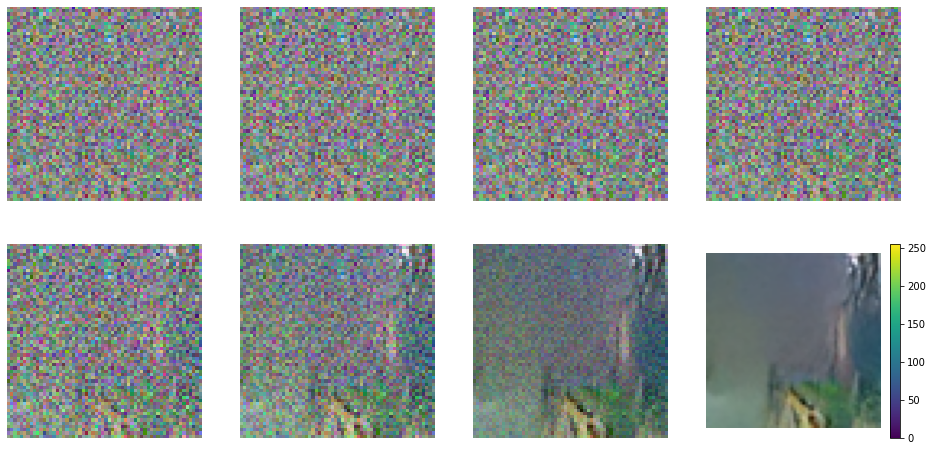

In [76]:
patch_size = (C,60,60) #choose 28x28 for mnist patch size
x_c = torch.zeros(patch_size) 
if torch.cuda.is_available():
    x = x.cuda()
synth = synthesis()
sample, interm_Ys = univ_inv_sol(denoiser, 
                                 x_c = x_c, 
                                 task = synth,
                                 sig_0 = 1,
                                 sig_L = 0.01, 
                                 h0 = 0.05, 
                                 beta = 1,  # change beta to see how quality of generated samples change       
                                 freq = 2,
                                pr = False)
plot_all_samples(sample, interm_Ys)


#### Influence of the Beta Parameter on the Final Image

Execution time: 3.598569393157959
Execution time: 5.9385600090026855
Execution time: 3.172182083129883
Execution time: 6.355319261550903
Execution time: 9.550384044647217
Execution time: 12.78966999053955
Execution time: 15.929555177688599


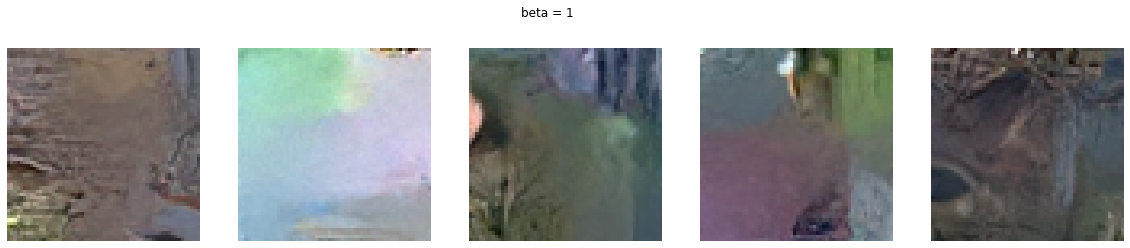

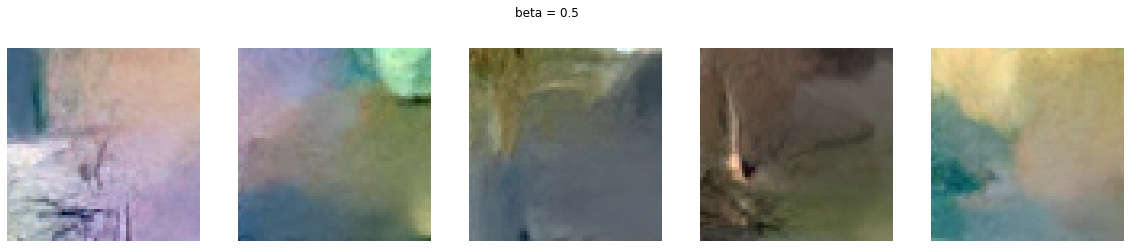

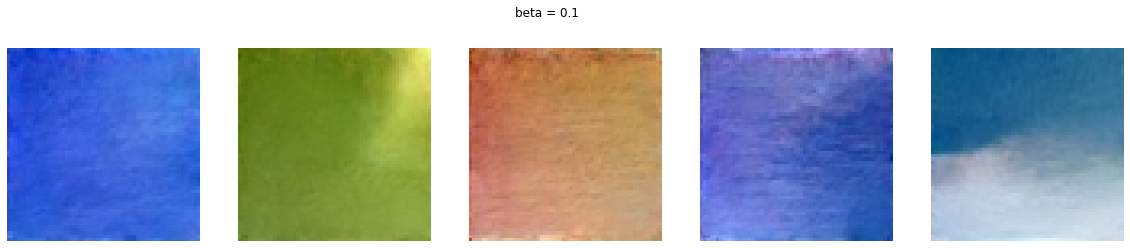

In [75]:
########## BETA = 1 ##########

patch_size = (C,60,60) #choose 28x28 for mnist patch size
x_c = torch.zeros(patch_size) 
if torch.cuda.is_available():
    x = x.cuda()
synth = synthesis()
t = time.time()
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))
plt.suptitle("beta = 1")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 1,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')
print("Execution time: {}".format(time.time()-t))   

########## BETA = 0.5 ##########

t = time.time()
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
plt.suptitle("beta = 0.5")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.5,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')
    
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
print("Execution time: {}".format(time.time()-t))

########## BETA = 0.1 ##########

t = time.time()

plt.suptitle("beta = 0.1")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.1,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')

    print("Execution time: {}".format(time.time()-t))   


The beta parameter has another impact on the code compilation besides the final result: compilation time. The more artificial noise we add at each iteration, the longer it takes to reach the minimum, aligning with the formula $\sigma_t^2 = (1-\beta h_t)^2\sigma_{t-1}^2$: as beta approaches 0, the rate of geometric decay of variance tends toward 1.

The generated images lack a specific meaning because the neural network has been trained to denoise arbitrary images. We only obtain images that appear natural from a distance as they are composed of general shapes and contours. To generate images with specific meaning, the network needs to be trained on images of a similar context.

This is what we do when dealing with images of handwritten digits trained on the MNIST dataset:

In [77]:
architecture = 'BF_CNN'

# Choix de bdd: 'mnist_gray', 'BSD300_color', 'BSD400_gray'
training_data = 'mnist_gray'

if 'color' in training_data.split('_'): 
    grayscale = False # number of input and output channels is 3
    C = 3
else: 
    grayscale = True # number of input and output channels is 1
    C = 1
    
training_noise='noise_range_0to100' # Le réseau de neurone est entraîné sur des images de bruit d'amplitude variées

denoiser = load_denoiser(architecture=architecture, 
                         grayscale=grayscale, 
                         training_data=training_data, 
                         training_noise=training_noise)

denoiser.eval();

Execution time: 1.431304693222046
Execution time: 4.497973442077637
Execution time: 16.58912205696106
Execution time: 16.042681455612183


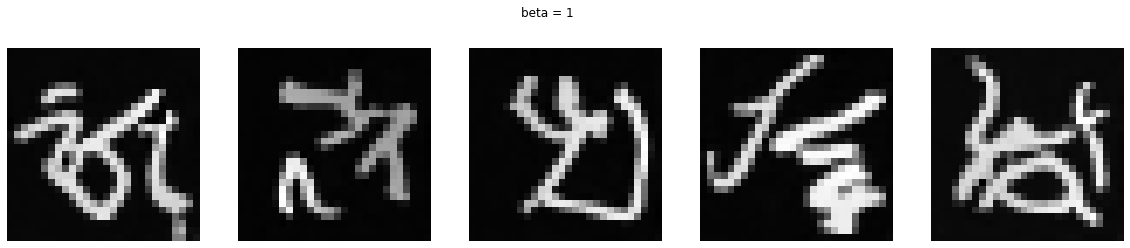

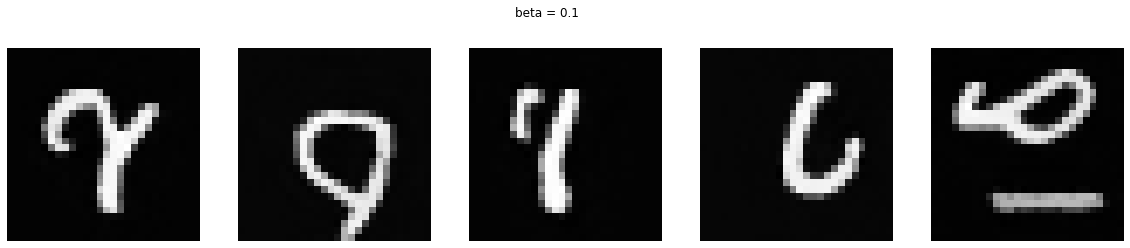

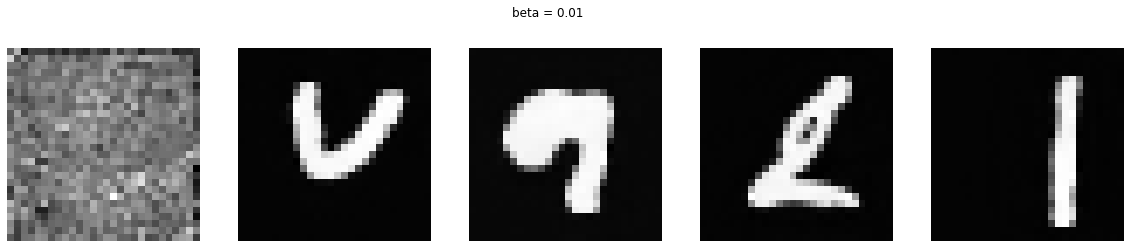

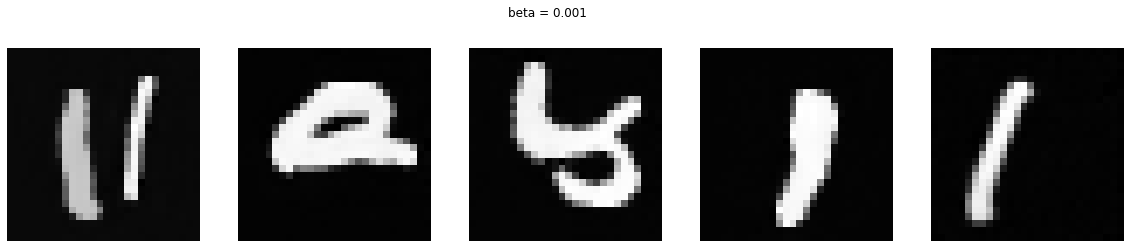

In [84]:
########## BETA = 1 ##########

patch_size = (C,28,28) #choose 28x28 for mnist patch size
x_c = torch.zeros(patch_size) 
if torch.cuda.is_available():
    x = x.cuda()
synth = synthesis()
t = time.time()
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))
plt.suptitle("beta = 1")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 1,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')
print("Execution time: {}".format(time.time()-t))   

########## BETA = 0.5 ##########

t = time.time()
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
plt.suptitle("beta = 0.1")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.1,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')
    
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
print("Execution time: {}".format(time.time()-t))

########## BETA = 0.01 ##########

t = time.time()

plt.suptitle("beta = 0.01")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.01,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')

f, axs = plt.subplots(1,5, figsize = ( 4*5,4))    
print("Execution time: {}".format(time.time()-t)) 
    
    ########## BETA = 0.001 ##########

t = time.time()

plt.suptitle("beta = 0.001")
for i in range(5):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = x_c, 
                                     task = synth,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.05, 
                                     beta = 0.001,  # change beta to see how quality of generated samples change       
                                     freq = 5,
                                    pr = False)

    ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach().numpy()
    if sample.shape[2] == 1: # if grayscale
        fig = axs[i].imshow(sample.squeeze(-1),'gray' )
    else: # if color
        fig = axs[i].imshow(rescale_image(sample))

    axs[i].axis('off')

print("Execution time: {}".format(time.time()-t))   



The previous remarks about arbitrary color images still apply in the case of the MNIST dataset, which consists of handwritten digits. It can be observed that when beta is too large, the obtained results are highly detailed and deviate from the digits; the algorithm fails to converge to a satisfactory minimum. As beta is decreased, the results approach shapes resembling digits, but there are cases where the algorithm converges to an image still composed of noise (possibly due to a not strict enough convergence criterion). Additionally, when beta becomes too small, a single vertical line is often obtained: adding too much noise at each iteration allows the algorithm to converge to a global minimum, likely corresponding to this vertical bar.

## Linear inverse problem
The previous approach involved generating an image from complete Gaussian noise. We can now focus on image restoration: in general, we consider an image that has been altered by a linear process and subsequently noisy.
### Image to restore


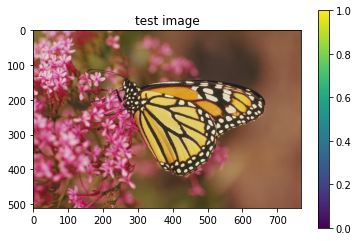

In [151]:
if grayscale is True: 
    path = 'test_images/grayscale/'
else: 
    path = 'test_images/color/'

# test sets: 'Set14', 'Set5', 'BSD100'
test_folder = 'Set14'

# choose an image number
im_num = 2

X = test_image(grayscale, path+test_folder+'/', im_num)
X.show()

### 1  Hole in the image

In this case, a portion of the image (a square in this case) is completely removed, and then we ad noise to the entier image. We are thus examining whether the algorithm can recover the missing portion.

Initially, we can try it on a relatively simple image: the stripes on the butterfly's wings. We focus only on a subpart of the image to keep computation times reasonable.

torch.Size([3, 60, 60])

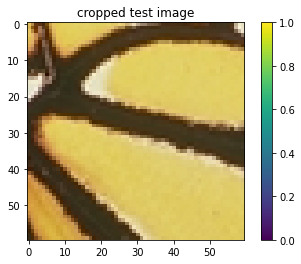

In [172]:
x = X.crop(190, 320,60,60)
x.shape

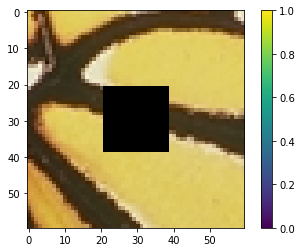

In [173]:
inpaint = inpainting(x_size=x.size(), y0=30, x0=30, h=19, w=19)
plot_corrupted_im(inpaint.M(inpaint.M_T(x)))

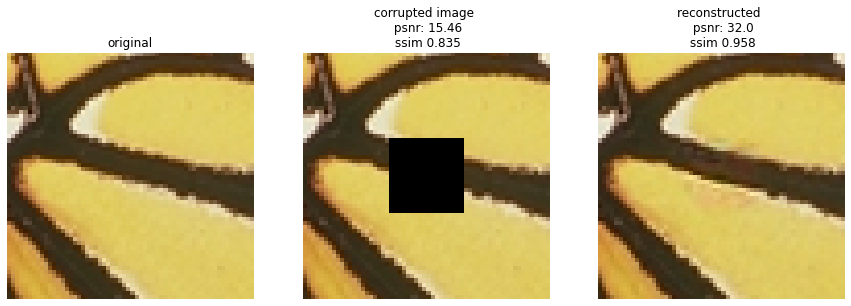

In [176]:
sample, interm_Ys = univ_inv_sol(denoiser, 
                                 x_c = inpaint.M_T(x), 
                                 task = inpaint,
                                 sig_0 = 1,
                                 sig_L = 0.01, 
                                 h0 = 0.1, 
                                 beta = 0.01,          
                                 freq = 40,
                                pr = False)
plot_sample(x, inpaint.M(inpaint.M_T(x)), sample)

When the missing portion of the image is simple, we can observe that the obtained result is very satisfactory. The algorithm successfully extends the black line in the missing area and suggests a consistent background color along the edges. Moreover, the PSNR and SSIM scores are very high. If we replicate the same experiment with a larger beta (hence less noise added at each iteration), we can see that the obtained result is worse.

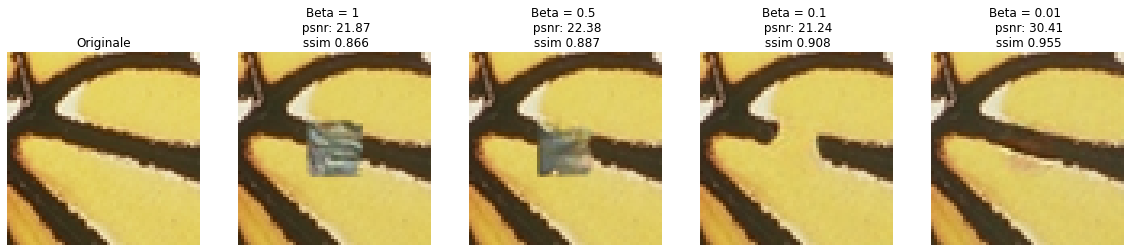

In [197]:
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))

x_permute = x.permute(1,2,0).detach()
axs[0].imshow(rescale_image(x_permute))
axs[0].set_title("Originale")
axs[0].axis('off')

for i, beta in enumerate([1, 0.5, 0.1, .01]):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = inpaint.M_T(x), 
                                     task = inpaint,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.1, 
                                     beta = beta,          
                                     freq = 40,
                                    pr = False)
        ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach()
    ssim = np.round(structural_similarity(x_permute.numpy(), sample.numpy() , channel_axis=2 , data_range=1) ,3)
    psnr = np.round(peak_signal_noise_ratio(x_permute.numpy(), sample.numpy() ),2)   
    axs[i+1].set_title('Beta = {} \n psnr: '.format(beta)+str( psnr) + '\n ssim '+ str(ssim)); 
    axs[i+1].imshow(rescale_image(sample))
    axs[i+1].axis('off')

Using a low beta parameter allows exploring the phase space and increases the chances of finding a minimum close to the global minimum, meaning a result close to the original image. Generally, in all image restoration problems altered by a linear process, it will be important to set the beta parameter to a low value.

torch.Size([3, 70, 70])

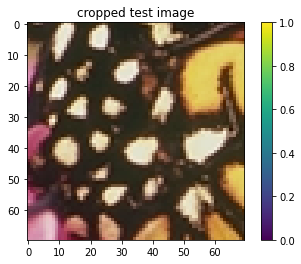

In [219]:
x = X.crop(170, 260,70,70)
x.shape

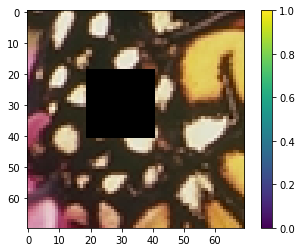

In [220]:
inpaint = inpainting(x_size=x.size(), y0=30, x0=30, h=22, w=22)

plot_corrupted_im(inpaint.M(inpaint.M_T(x)))

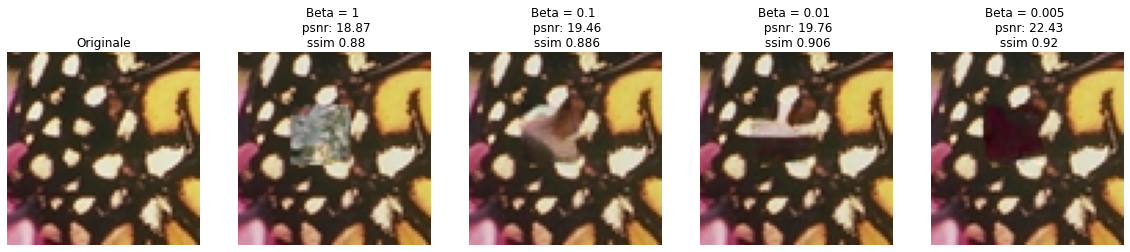

In [217]:
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))

x_permute = x.permute(1,2,0).detach()
axs[0].imshow(rescale_image(x_permute))
axs[0].set_title("Originale")
axs[0].axis('off')

for i, beta in enumerate([1, 0.1, 0.01, .005]):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = inpaint.M_T(x), 
                                     task = inpaint,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.1, 
                                     beta = beta,          
                                     freq = 40,
                                    pr = False)
        ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach()
    ssim = np.round(structural_similarity(x_permute.numpy(), sample.numpy() , channel_axis=2 , data_range=1) ,3)
    psnr = np.round(peak_signal_noise_ratio(x_permute.numpy(), sample.numpy() ),2)   
    axs[i+1].set_title('Beta = {} \n psnr: '.format(beta)+str( psnr) + '\n ssim '+ str(ssim)); 
    axs[i+1].imshow(rescale_image(sample))
    axs[i+1].axis('off')

When the image is more detailed, the results are much less satisfying; the restored pixels tend to be more or less an average of the surrounding pixels, and the patterns are not reproduced even with very low values of beta.

#### Black and White Images

In [291]:
architecture = 'BF_CNN'

# Choix de bdd: 'mnist_gray', 'BSD300_color', 'BSD400_gray'
training_data = 'BSD400_gray'

if 'color' in training_data.split('_'): 
    grayscale = False # number of input and output channels is 3
    C = 3
else: 
    grayscale = True # number of input and output channels is 1
    C = 1
    
training_noise='noise_range_0to100' # Le réseau de neurone est entraîné sur des images de bruit d'amplitude variées

denoiser = load_denoiser(architecture=architecture, 
                         grayscale=grayscale, 
                         training_data=training_data, 
                         training_noise=training_noise)

denoiser.eval();

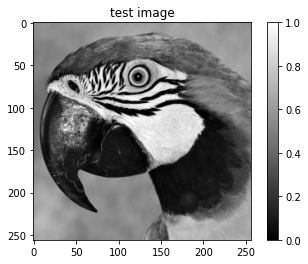

In [310]:
path = 'test_images/grayscale/'
# test sets: 'mnist', 'Set12', 'set68'
test_folder = 'Set12'

# choose an image number
im_num = 10

X = test_image(grayscale, path+test_folder+'/', im_num)
X.show()

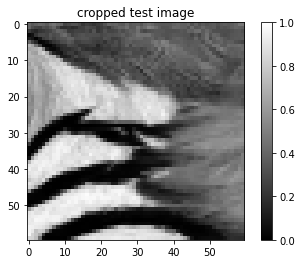

In [323]:
x = X.crop(40,140,60,60)

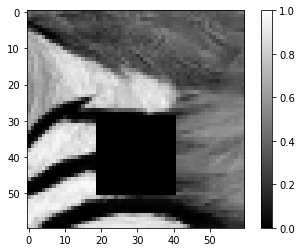

In [324]:
inpaint = inpainting(x_size=x.size(), y0=30, x0=40, h=22, w=22)

plot_corrupted_im(inpaint.M(inpaint.M_T(x)))

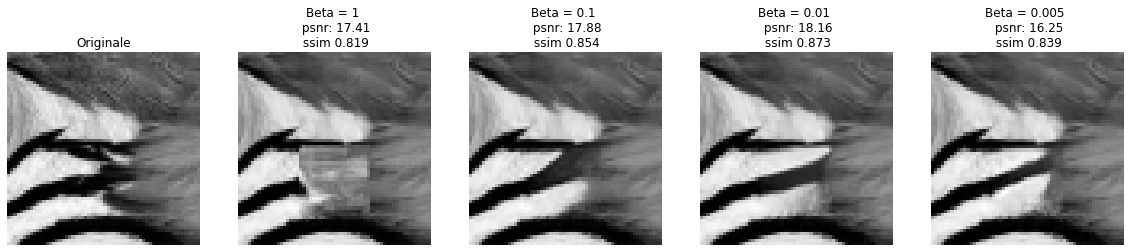

In [326]:
f, axs = plt.subplots(1,5, figsize = ( 4*5,4))

x_permute = x.permute(1,2,0).detach()
axs[0].imshow(x_permute.squeeze(-1),'gray' ,vmin=0, vmax = 1)
axs[0].set_title("Originale")
axs[0].axis('off')

for i, beta in enumerate([1, 0.1, 0.01, .005]):
    sample, interm_Ys = univ_inv_sol(denoiser, 
                                     x_c = inpaint.M_T(x), 
                                     task = inpaint,
                                     sig_0 = 1,
                                     sig_L = 0.01, 
                                     h0 = 0.1, 
                                     beta = beta,          
                                     freq = 40,
                                    pr = False)
        ## plot the progression and the final sample
    axs = axs.ravel()
    sample = sample.permute(1,2,0).detach()
    ssim = np.round(structural_similarity(x_permute.squeeze(-1).numpy(), sample.squeeze(-1).numpy() , data_range=1) ,3)
    psnr = np.round(peak_signal_noise_ratio(x_permute.numpy(), sample.numpy() ),2)   
    axs[i+1].set_title('Beta = {} \n psnr: '.format(beta)+str( psnr) + '\n ssim '+ str(ssim)); 
    axs[i+1].imshow(sample.squeeze(-1),'gray' ,vmin=0, vmax = 1)
    axs[i+1].axis('off')

In the case of black and white images, we observe lower precision scores, likely due to a lower amount of information to reconstruct the image. However, the obtained images still appear natural; they are just not as close to the original image.